# 2. Feature Importance

## A360 MDK interface

In [7]:
a360ai

<A360 AI Interface for project: use-case-logistics>

In [8]:
# Get default data repo
DATAREPO_LIST = a360ai.list_datarepos()
DATAREPO = DATAREPO_LIST['name'][0]
DATAREPO

'use-case-logistics'

In [9]:
import numpy as np
import pandas as pd

## 1. Set Default Data Repo and load data

In [10]:
a360ai.set_default_datarepo(DATAREPO)


In [11]:
a360ai.list_datasets()

,base_name,extension,size
0,data_traffic_congestion_2020.csv,csv,36377405


In [12]:
data = a360ai.load_dataset('data_traffic_congestion_2020.csv')

In [13]:
data.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction
0,13/02/2020,Thursday,9th_avenue,1000,Jinnah Avenue,60,no,no,capital_gymkhana,0:00:01,Showers,smooth
1,13/02/2020,Thursday,centaurus,1300,Jinnah Avenue,120,no,no,9th_avenue,0:00:09,Showers,highly congested
2,13/02/2020,Thursday,crown_plaza,1000,Jinnah Avenue and Faisal Avenue Flyover,60,no,no,centaurus,0:00:17,Showers,smooth
3,13/02/2020,Thursday,roshan_plaza,2700,Jinnah Ave,180,no,no,crown_plaza,0:00:24,Showers,smooth
4,13/02/2020,Thursday,salt_and_pepper,3900,Jinnah Ave,300,no,no,roshan_plaza,0:00:31,Showers,slightly congested


In [14]:
data['Date'] = pd.to_datetime(data.Date, format='%d/%m/%Y')

## Cleaning the Data

In [15]:
def create_date_features(df):
    df['month'] = df.Date.dt.month
    df['day_of_month'] = df.Date.dt.day
    df['day_of_year'] = df.Date.dt.dayofyear
    df['week_of_year'] = df.Date.dt.weekofyear
    df['year'] = df.Date.dt.year
    #check
    df["is_wknd"] = df.Date.dt.weekday // 4
    df['is_month_start'] = df.Date.dt.is_month_start.astype(int)
    df['is_month_end'] = df.Date.dt.is_month_end.astype(int)
    return df

In [16]:
data = create_date_features(data)

/tmp/ipykernel_156/3270568885.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df.Date.dt.weekofyear


In [17]:
data

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction,month,day_of_month,day_of_year,week_of_year,year,is_wknd,is_month_start,is_month_end
0,2020-02-13,Thursday,9th_avenue,1000,Jinnah Avenue,60,no,no,capital_gymkhana,0:00:01,Showers,smooth,2,13,44,7,2020,0,0,0
1,2020-02-13,Thursday,centaurus,1300,Jinnah Avenue,120,no,no,9th_avenue,0:00:09,Showers,highly congested,2,13,44,7,2020,0,0,0
2,2020-02-13,Thursday,crown_plaza,1000,Jinnah Avenue and Faisal Avenue Flyover,60,no,no,centaurus,0:00:17,Showers,smooth,2,13,44,7,2020,0,0,0
3,2020-02-13,Thursday,roshan_plaza,2700,Jinnah Ave,180,no,no,crown_plaza,0:00:24,Showers,smooth,2,13,44,7,2020,0,0,0
4,2020-02-13,Thursday,salt_and_pepper,3900,Jinnah Ave,300,no,no,roshan_plaza,0:00:31,Showers,slightly congested,2,13,44,7,2020,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317107,2020-02-29,Saturday,IJP road,4400,Murree Rd and I.J.P. Road,540,no,no,mehran hotel,23:57:23,Mostly Cloudy,slightly congested,2,29,60,9,2020,1,0,1
317108,2020-02-29,Saturday,Jamia Masjid Bilal,1000,I.J.P. Road,180,no,no,IJP road,23:57:36,Mostly Cloudy,congested,2,29,60,9,2020,1,0,1
317109,2020-02-29,Saturday,eventox_event_management,1000,Sufi Tabasum Rd and Service Rd W,120,no,no,STroad_start_stop,23:57:46,Mostly Cloudy,highly congested,2,29,60,9,2020,1,0,1
317110,2020-02-29,Saturday,Al_hateem_palace,1100,Service Rd South I 8,120,no,no,IJP_metro,23:58:18,Mostly Cloudy,highly congested,2,29,60,9,2020,1,0,1


In [18]:
from sklearn.preprocessing import OrdinalEncoder
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
data[['Destination_Location','Day','Fastest_Route_Name','Starting_Location','Weather','Data_prediction']] = encoder.fit_transform(data[['Destination_Location','Day','Fastest_Route_Name','Starting_Location','Weather','Data_prediction']])
print(data)

             Date       Day      Destination_Location  Fastest_Route_Distance  \
0      2020-02-13  Thursday                9th_avenue                    1000   
1      2020-02-13  Thursday                 centaurus                    1300   
2      2020-02-13  Thursday               crown_plaza                    1000   
3      2020-02-13  Thursday              roshan_plaza                    2700   
4      2020-02-13  Thursday           salt_and_pepper                    3900   
...           ...       ...                       ...                     ...   
317107 2020-02-29  Saturday                  IJP road                    4400   
317108 2020-02-29  Saturday        Jamia Masjid Bilal                    1000   
317109 2020-02-29  Saturday  eventox_event_management                    1000   
317110 2020-02-29  Saturday          Al_hateem_palace                    1100   
317111 2020-02-29  Saturday                 last_stop                    1400   

                           

In [19]:
data.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction,month,day_of_month,day_of_year,week_of_year,year,is_wknd,is_month_start,is_month_end
0,2020-02-13,4.0,1.0,1000,12.0,60,no,no,13.0,0:00:01,7.0,4.0,2,13,44,7,2020,0,0,0
1,2020-02-13,4.0,12.0,1300,12.0,120,no,no,1.0,0:00:09,7.0,2.0,2,13,44,7,2020,0,0,0
2,2020-02-13,4.0,14.0,1000,13.0,60,no,no,15.0,0:00:17,7.0,4.0,2,13,44,7,2020,0,0,0
3,2020-02-13,4.0,40.0,2700,10.0,180,no,no,17.0,0:00:24,7.0,4.0,2,13,44,7,2020,0,0,0
4,2020-02-13,4.0,41.0,3900,10.0,300,no,no,40.0,0:00:31,7.0,3.0,2,13,44,7,2020,0,0,0


In [20]:
data.drop(["Holiday","Special_Condition","Sys_Time","Date"], axis = 1, inplace = True)

In [21]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

## Training the model

In [22]:
X = data.drop(["Data_prediction"], axis=1)
y = data["Data_prediction"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 221978
Number of rows in test data = 95134


In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, RFE, SelectFromModel, SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
#convertig to category reduces data space required
data["Destination_Location"]=data["Destination_Location"].astype("category")
data["Day"]=data["Day"].astype("category")
data["Fastest_Route_Name"]=data["Fastest_Route_Name"].astype("category")
data["Starting_Location"]=data["Starting_Location"].astype("category")
data["Weather"]=data["Weather"].astype("category")

In [27]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50,max_features=4)
model_tree.fit(x_train, y_train)
print(model_tree.feature_importances_)

sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
                    # since we already fit the data, we specify prefit option here
                    # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(x_train)

[4.74614796e-03 1.11300346e-01 1.83332687e-01 5.65608855e-02
 4.93804574e-01 1.27242155e-01 1.34467635e-02 0.00000000e+00
 3.35196916e-03 3.36425785e-03 1.14443995e-03 0.00000000e+00
 1.54947407e-03 0.00000000e+00 1.56299768e-04]


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [28]:
print(sel_model_tree.get_support())
print(sel_model_tree.get_params())

[False  True  True False  True  True False False False False False False
 False False False]
{'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 4, 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 50, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 100, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(max_features=4, n_estimators=50, random_state=100), 'importance_getter': 'auto', 'max_features': None, 'norm_order': 1, 'prefit': True, 'threshold': 'mean'}


In [29]:
predict = model_tree.predict(x_test)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[  504     0     6     0     0]
 [    0  7418     0     1     0]
 [    0     2 37589     1     0]
 [    0     0     0  8146     0]
 [    0     0     0     0 41467]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       510
         1.0       1.00      1.00      1.00      7419
         2.0       1.00      1.00      1.00     37592
         3.0       1.00      1.00      1.00      8146
         4.0       1.00      1.00      1.00     41467

    accuracy                           1.00     95134
   macro avg       1.00      1.00      1.00     95134
weighted avg       1.00      1.00      1.00     95134



In [30]:
feature_names = list(X.columns)


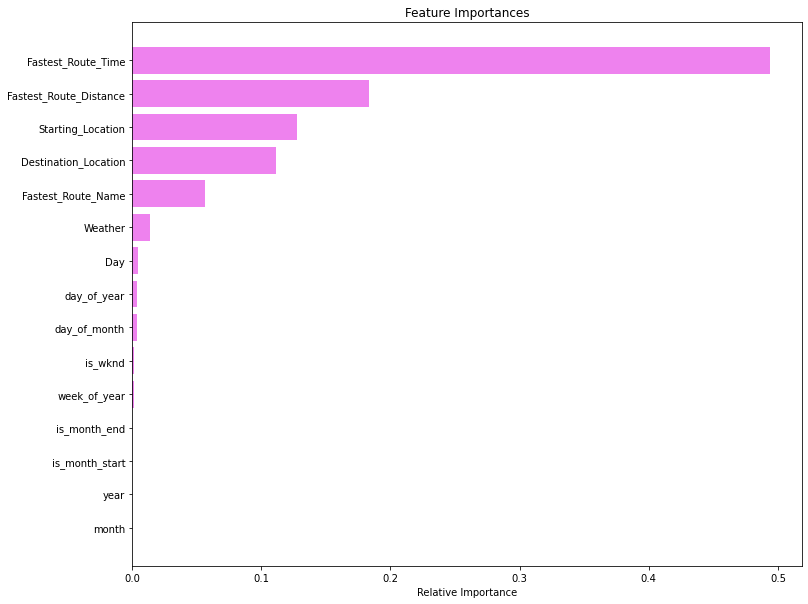

In [31]:
importances = model_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()